In [1]:
import pandas as pd
import numpy as np

from scale.plot import plot_embedding, plot_heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
def plot_motif_embedding(X, labels, classes=None, method='TSNE', title='', cmap='tab20', figsize=(4, 4), markersize=1, marker=None,
                   return_emb=False, save=False, save_emb=False, show_legend=True, show_axis_label=True, **legend_params):
    if marker is not None:
        X = np.concatenate([X, marker], axis=0)
    N = len(labels)
        
    plt.figure(figsize=figsize)
    if classes is None:
        classes = np.unique(labels)

    if cmap is not None:
        cmap = cmap
    elif len(classes) <= 10:
        cmap = 'tab10'
    elif len(classes) <= 20:
        cmap = 'tab20'
    else:
        cmap = 'husl'
    colors = sns.color_palette(cmap, n_colors=len(classes))
        
    plt.scatter(X[:,0], X[:,1], s=markersize, c=labels, cmap=cmap)
    plt.title(title)
    plt.colorbar(anchor=(-0.5, 0.1), shrink=0.5, fraction=0.1, pad=0.05, label='deviation score') #, ticks=[-5, 0, 5])
    sns.despine(offset=10, trim=True)
    if show_axis_label:
        plt.xlabel(method+' dim 1', fontsize=12)
        plt.ylabel(method+' dim 2', fontsize=12)

    if save:
        plt.savefig(save, format='pdf', bbox_inches='tight')
    else:
        plt.show()
        
    if save_emb:
        np.savetxt(save_emb, X)
    if return_emb:
        return X

In [3]:
data = pd.read_csv('data/Forebrain/data.txt', sep='\t', index_col=0)
imputed = pd.read_csv('result/Forebrain/imputed_data.txt', sep='\t', index_col=0)
y = pd.read_csv('data/Forebrain/labels.txt', sep='\t', index_col=0, header=None)[1].values

## Figure S10a

In [4]:
dev = pd.read_csv('result/Forebrain/imputed_chromVAR_dev.txt', sep='\t', index_col=0)
var = pd.read_csv('result/Forebrain/imputed_chromVAR_var.txt', sep='\t', index_col=0)
index = var[var['p_value_adj']<0.05].index; print(len(index))
dev = dev.iloc[index].fillna(0)
dev.index = var.iloc[index]['name']

105


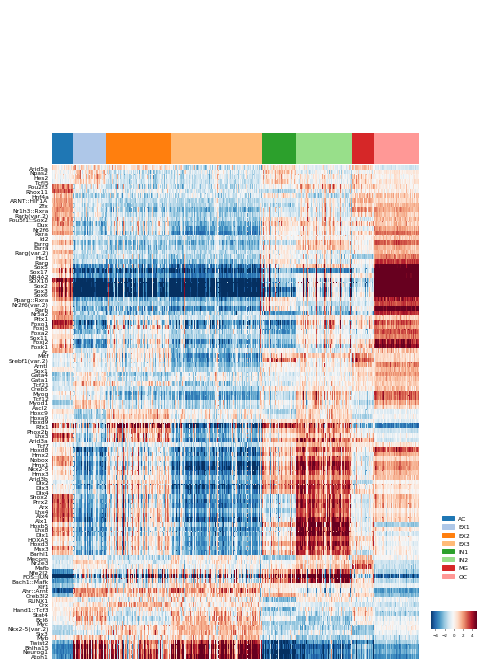

In [5]:
plot_heatmap(dev, y, row_cluster=True, cmap='RdBu_r', figsize=(8, 12),
             center=0, vmax=5, vmin=-5, metric='cosine', yticklabels=dev.index.values,
             legend_font=6, ncol=1,
             bbox_to_anchor=(1.1, 0.3), position=(0.92, 0.16, .08, .02),
            )

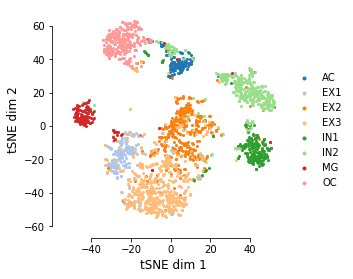

In [6]:
# emb = plot_embedding(dev.T, y, return_emb=True, save_emb='result/Forebrain/imputed_chromvar_tsne.txt')
emb = np.loadtxt('result/Forebrain/imputed_chromvar_tsne.txt')
plot_embedding(emb, y)

In [ ]:
motifs = ["Dlx1", "Dlx2",  "Lhx8", "Mafb",  "Sox6", "Arx", "Sox5",  "Sox2", "Hoxd9", "SOX10", 'Neurog1', 'FOS::JUN']

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


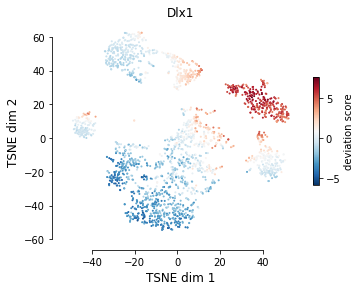

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


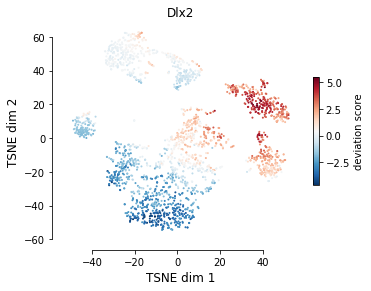

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


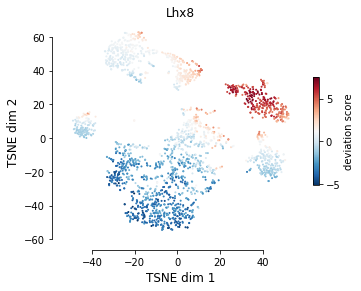

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


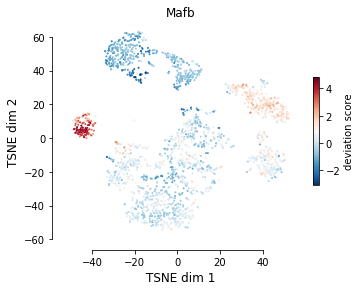

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


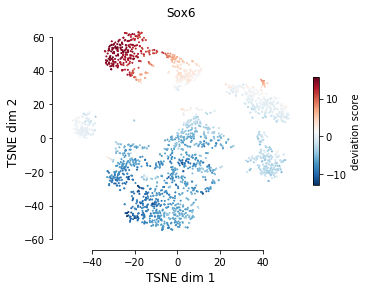

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


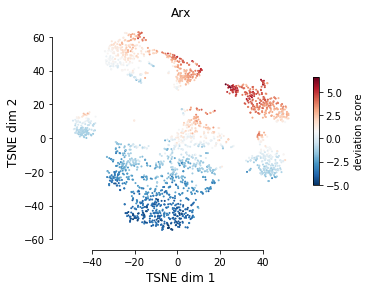

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


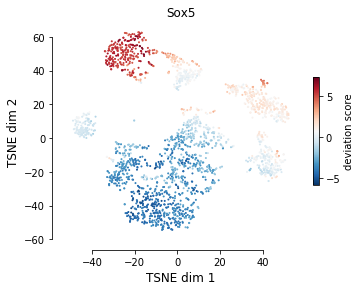

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


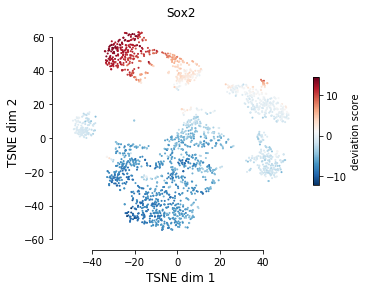

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


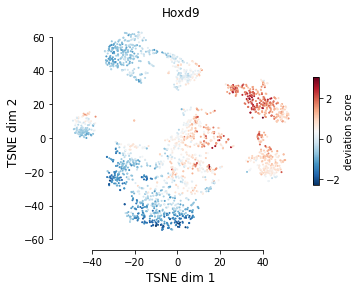

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


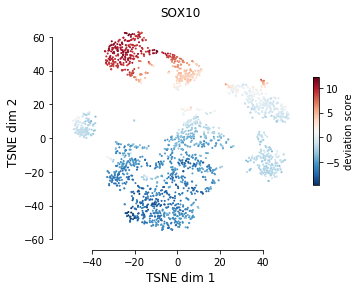

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


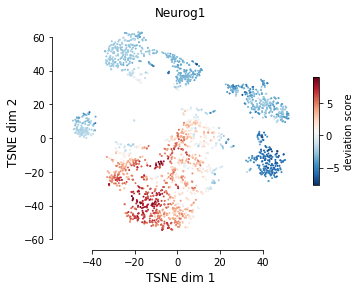

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


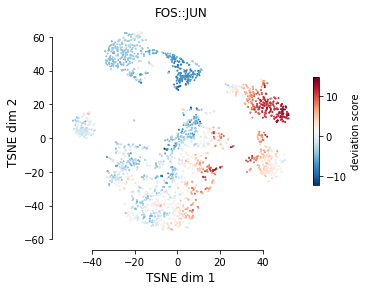

In [7]:
for motif in motifs:
    if motif in dev.index:
        plot_motif_embedding(emb, dev.loc[motif], cmap='RdBu_r', figsize=(5,4), title=motif)

## Figure S10b

In [8]:
dev = pd.read_csv('result/Forebrain/raw_chromVAR_dev.txt', sep='\t', index_col=0)
var = pd.read_csv('result/Forebrain/raw_chromVAR_var.txt', sep='\t', index_col=0)
index = var[var['p_value_adj']<0.05].index; print(len(index))
dev = dev.iloc[index].fillna(0)
dev.index = var.iloc[index]['name']

52


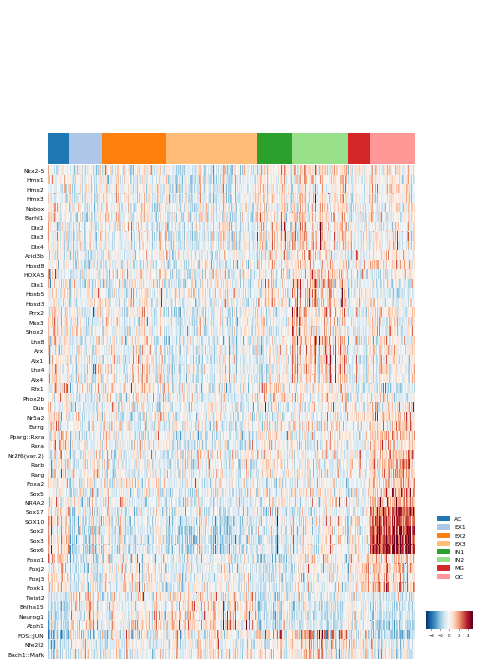

In [9]:
plot_heatmap(dev, y, row_cluster=True, cmap='RdBu_r', figsize=(8, 12),
             center=0, vmax=5, vmin=-5, metric='cosine', yticklabels=dev.index.values,
             legend_font=6, ncol=1,
             bbox_to_anchor=(1.1, 0.3), position=(0.92, 0.16, .08, .02),
            )

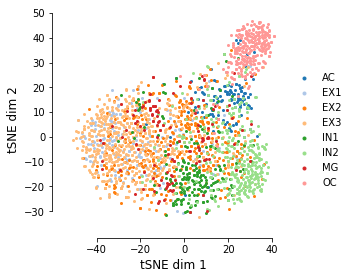

In [10]:
# emb = plot_embedding(dev.T, y, return_emb=True, save_emb='result/Forebrain/raw_chromvar_tsne.txt')
emb = np.loadtxt('result/Forebrain/raw_chromvar_tsne.txt')
plot_embedding(emb, y)

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


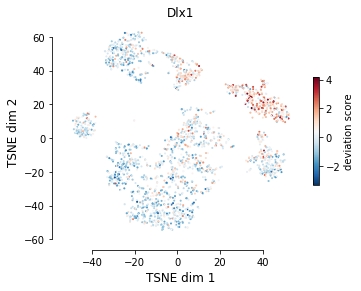

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


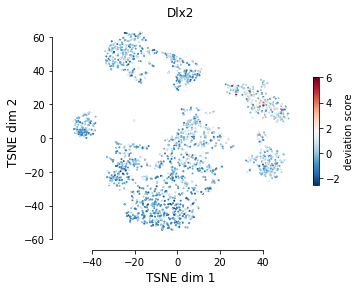

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


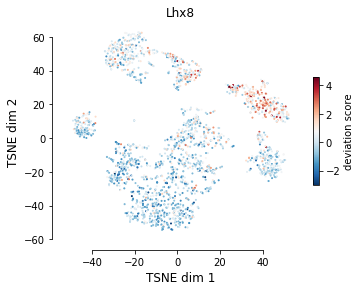

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


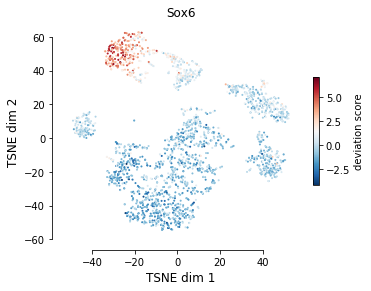

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


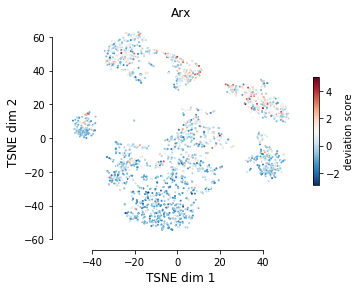

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


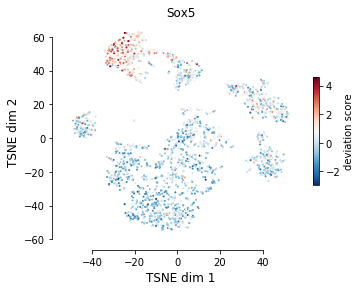

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


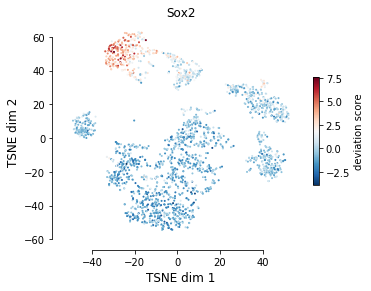

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


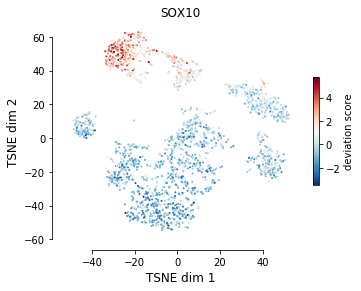

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


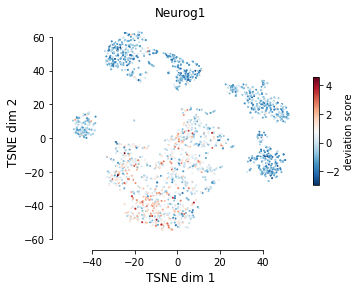

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


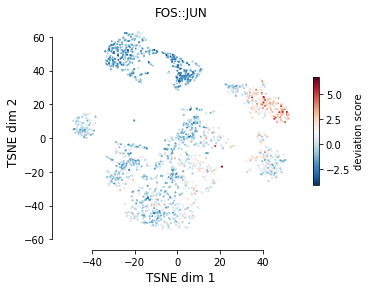

In [11]:
emb = np.loadtxt('result/Forebrain/imputed_chromvar_tsne.txt')
for motif in motifs:
    if motif in dev.index:
        plot_motif_embedding(emb, dev.loc[motif], cmap='RdBu_r', figsize=(5,4), title=motif)